<a href="https://colab.research.google.com/github/rinazbelhaj/EVA/blob/master/Project%205/Assignment%205.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 5

## Main objective :
Introduce following changes in the network and note down the effects
1.   image normalization
2.   L2 regularization
3.   ReLU after BN





# **Import Libraries and modules**

In [0]:
# https://keras.io/
!pip install -q keras
import keras

Using TensorFlow backend.


In [0]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import np_utils

from keras.datasets import mnist

### Load pre-shuffled MNIST data into train and test sets

In [0]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 2s 0us/step


(60000, 28, 28)


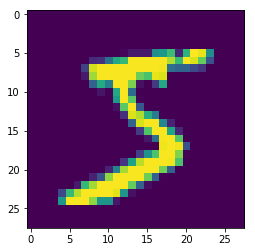

In [0]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[0])

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [0]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [0]:
Y_train[:10]


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [0]:
from keras.layers import Activation,BatchNormalization
from keras import regularizers

model = Sequential()

 
model.add(Conv2D(10, (3, 3), activation=None,kernel_regularizer=regularizers.l2(0.01),input_shape=(28,28,1), name='conv_1')) # 26
model.add(BatchNormalization(name='bn_1'))
model.add(Activation('relu',name='activ_1'))
model.add(Conv2D(10, (3, 3), activation=None,kernel_regularizer=regularizers.l2(0.01), name='conv_2')) # 24
model.add(BatchNormalization(name='bn_2'))
model.add(Activation('relu',name='activ_2'))
model.add(Conv2D(10, (3, 3), activation=None,kernel_regularizer=regularizers.l2(0.01), name='conv_3')) # 22
model.add(BatchNormalization(name='bn_3'))
model.add(Activation('relu',name='activ_3'))
model.add(Dropout(0.10,name='dropout_1'))

model.add(MaxPooling2D(pool_size=(2, 2), name='pool_1')) # 11

model.add(Conv2D(10, (3, 3), activation=None,kernel_regularizer=regularizers.l2(0.01), name='conv_4')) # 9
model.add(BatchNormalization(name='bn_4'))
model.add(Activation('relu',name='activ_4'))
model.add(Conv2D(10, (3, 3), activation=None,kernel_regularizer=regularizers.l2(0.01), name='conv_5')) # 7
model.add(BatchNormalization(name='bn_5'))
model.add(Activation('relu',name='activ_5'))
model.add(Dropout(0.10,name='dropout_2'))
model.add(Conv2D(32, (3, 3), activation=None,kernel_regularizer=regularizers.l2(0.01), name='conv_6')) # 5
model.add(BatchNormalization(name='bn_6'))
model.add(Activation('relu',name='activ_6'))
model.add(Dropout(0.10,name='dropout_3'))

model.add(Conv2D(10, (1, 1), activation=None,kernel_regularizer=regularizers.l2(0.01), name='conv_6a')) # 5
model.add(BatchNormalization(name='bn_7'))
model.add(Activation('relu',name='activ_7'))
model.add(Conv2D(10, (3, 3), activation=None,kernel_regularizer=regularizers.l2(0.01), name='conv_7')) #3
model.add(BatchNormalization(name='bn_8'))
model.add(Activation('relu',name='activ_8'))
model.add(Conv2D(10, (3, 3),kernel_regularizer=regularizers.l2(0.00), name='conv_8')) # 1
model.add(Flatten(name='flatten'))
model.add(Activation('softmax', name='softmax'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv_1 (Conv2D)              (None, 26, 26, 10)        100       
_________________________________________________________________
bn_1 (BatchNormalization)    (None, 26, 26, 10)        40        
_________________________________________________________________
activ_1 (Activation)         (None, 26, 26, 10)        0         
_________________________________________________________________
conv_2 (Conv2D)              (None, 24, 24, 10)        910       
_________________________________________________________________
bn_2 (BatchNormalization)    (None, 24, 24, 10)        40        
_________________________________________________________________
activ_2 (Activation)         (None, 24, 24, 10)        0         
_________________________________________________________________
conv_3 (Conv2D)              (None, 22, 22, 10)        910       
__________

In [0]:
from keras.optimizers import Adam

adam = Adam(lr=0.04, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.01, amsgrad=False)

model.compile(loss='categorical_crossentropy',
             optimizer=adam,
             metrics=['accuracy'])

In [0]:
from keras.callbacks import ModelCheckpoint
from keras.preprocessing.image import ImageDataGenerator
from math import ceil

checkpointer = ModelCheckpoint(filepath="best_weights.hdf5", monitor = 'val_acc', verbose=0, save_best_only=True)

train_gen = ImageDataGenerator(featurewise_center=True,
                               featurewise_std_normalization=True,
                              )

test_gen = ImageDataGenerator(featurewise_center=True,
                              featurewise_std_normalization=True,
                              )


batch = 128
epochs = 40

# compute quantities required for featurewise normalization
# (std, mean, and principal components if ZCA whitening is applied)
train_gen.fit(X_train)
test_gen.fit(X_test)


model.fit_generator(train_gen.flow(X_train, Y_train, batch_size=batch),steps_per_epoch=ceil(len(X_train) / batch), epochs=epochs, 
                    validation_data=test_gen.flow(X_test, Y_test, batch_size=batch), validation_steps=ceil(len(X_test) / batch), callbacks=[checkpointer], verbose=1)

Epoch 1/40
469/469 [==============================] - 11s 23ms/step - loss: 0.5459 - acc: 0.9145 - val_loss: 0.4216 - val_acc: 0.9161
Epoch 2/40
469/469 [==============================] - 8s 16ms/step - loss: 0.2172 - acc: 0.9633 - val_loss: 0.2769 - val_acc: 0.9397
Epoch 3/40
469/469 [==============================] - 8s 16ms/step - loss: 0.1639 - acc: 0.9699 - val_loss: 0.5800 - val_acc: 0.8434
Epoch 4/40
469/469 [==============================] - 8s 16ms/step - loss: 0.1353 - acc: 0.9745 - val_loss: 0.1186 - val_acc: 0.9783
Epoch 5/40
469/469 [==============================] - 8s 16ms/step - loss: 0.1199 - acc: 0.9765 - val_loss: 0.1547 - val_acc: 0.9651
Epoch 6/40
469/469 [==============================] - 8s 16ms/step - loss: 0.1089 - acc: 0.9791 - val_loss: 0.1050 - val_acc: 0.9800
Epoch 7/40
469/469 [==============================] - 8s 16ms/step - loss: 0.0994 - acc: 0.9805 - val_loss: 0.0858 - val_acc: 0.9837
Epoch 8/40
469/469 [==============================] - 8s 16ms/step -

In [0]:

model.load_weights('best_weights.hdf5')
score = model.evaluate_generator(test_gen.flow(X_test, Y_test, batch_size=batch), steps=ceil(len(X_test) / batch), verbose=0)

In [0]:
print(score)

[0.043617197094857695, 0.9908]


In [0]:
y_pred = model.predict_generator(test_gen.flow(X_test, Y_test, batch_size=batch, shuffle=False), steps=ceil(len(X_test) / batch), verbose=1)

79/79 [==============================] - 0s 4ms/step


In [0]:
print(y_pred[:9])
print(y_test[:9])

[[3.9390553e-09 6.4863237e-08 6.7102947e-06 2.3729810e-07 9.5087705e-12
  2.9376251e-10 2.1213835e-14 9.9999285e-01 1.1286524e-10 1.6296821e-07]
 [2.2490605e-04 4.5824051e-04 9.9929845e-01 7.9178278e-07 7.6720784e-07
  1.4476003e-08 8.9109217e-06 2.3854632e-06 5.4980542e-06 5.1781507e-10]
 [9.4822759e-08 9.9995482e-01 2.0636637e-06 1.9385382e-08 3.1881093e-06
  2.4073331e-06 1.3159395e-06 2.8266197e-05 7.9056426e-06 7.4703816e-09]
 [9.9992299e-01 9.6217448e-08 4.5754418e-06 8.2324378e-09 6.8145971e-07
  7.9409159e-07 1.2844548e-05 2.2506331e-08 7.8656052e-07 5.7227760e-05]
 [2.6314451e-09 5.1502752e-08 1.3593711e-09 9.9064741e-12 9.9994361e-01
  1.5717205e-10 3.5953615e-08 2.1912844e-07 2.6936453e-07 5.5842753e-05]
 [3.2394173e-08 9.9952483e-01 2.0178729e-06 3.4784493e-09 6.1865799e-06
  1.0151569e-07 7.1533179e-08 4.6625509e-04 4.1458884e-07 1.3623843e-07]
 [9.4083052e-10 8.5819011e-05 9.2988998e-08 6.7716066e-08 9.9852091e-01
  3.3895319e-07 1.0061468e-08 1.1833168e-04 2.9638963e-04 

In [0]:
layer_dict = dict([(layer.name, layer) for layer in model.layers])

Number of Filters :  10


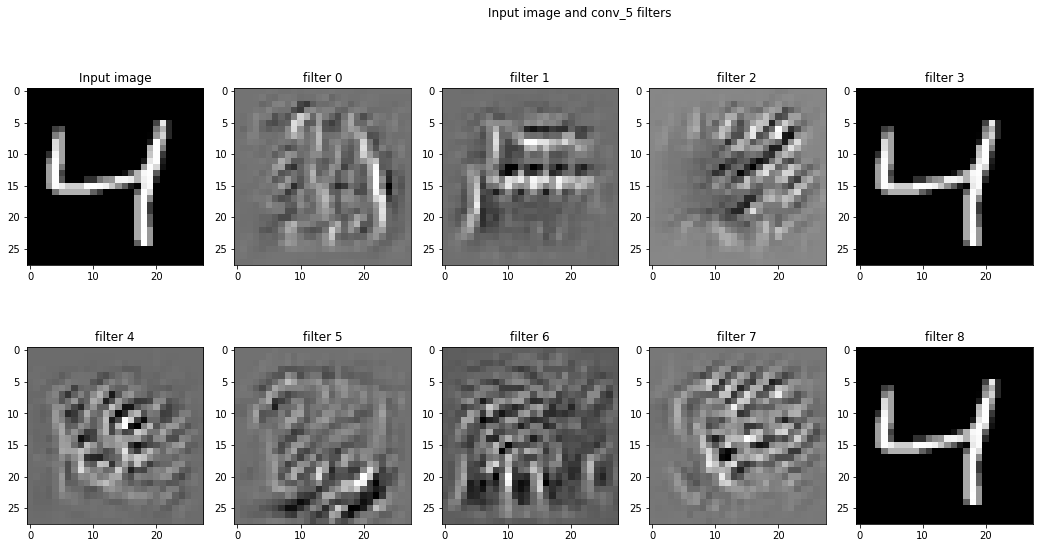

In [0]:
import numpy as np
from matplotlib import pyplot as plt
from keras import backend as K
%matplotlib inline
# util function to convert a tensor into a valid image
def deprocess_image(x):
    # normalize tensor: center on 0., ensure std is 0.1
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1

    # clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)

    # convert to RGB array
    x *= 255
    #x = x.transpose((1, 2, 0))
    x = np.clip(x, 0, 255).astype('uint8')
    return x

def vis_img_in_filter(img = np.array(X_train[2]).reshape((1, 28, 28, 1)).astype(np.float64), 
                      layer_name = 'conv_5'):
    layer_output = layer_dict[layer_name].output
    img_ascs = list()
    for filter_index in range(layer_output.shape[3]):
        # build a loss function that maximizes the activation
        # of the nth filter of the layer considered
        loss = K.mean(layer_output[:, :, :, filter_index])

        # compute the gradient of the input picture wrt this loss
        grads = K.gradients(loss, model.input)[0]

        # normalization trick: we normalize the gradient
        grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

        # this function returns the loss and grads given the input picture
        iterate = K.function([model.input], [loss, grads])

        # step size for gradient ascent
        step = 5.

        img_asc = np.array(img)
        # run gradient ascent for 20 steps
        for i in range(20):
            loss_value, grads_value = iterate([img_asc])
            img_asc += grads_value * step

        img_asc = img_asc[0]
        img_ascs.append(deprocess_image(img_asc).reshape((28, 28)))
        
    print("Number of Filters : ",layer_output.shape[3])
    if layer_output.shape[3] >= 35:
        plot_x, plot_y = 6, 6
    elif layer_output.shape[3] >= 23:
        plot_x, plot_y = 4, 8
    elif layer_output.shape[3] >= 11:
        plot_x, plot_y = 2, 6
    elif layer_output.shape[3] >= 5:
        plot_x, plot_y = 2, 5
    else:
        plot_x, plot_y = 1, 2
    fig, ax = plt.subplots(plot_x, plot_y, figsize = (16, 8))
    ax[0, 0].imshow(img.reshape((28, 28)), cmap = 'gray')
    ax[0, 0].set_title('Input image')
    fig.suptitle('Input image and %s filters' % (layer_name,))
    fig.tight_layout(pad = 0.0, rect = [0, 0, 0.9, 0.9])
    for (x, y) in [(i, j) for i in range(plot_x) for j in range(plot_y)]:
        if x == 0 and y == 0:
            continue
        ax[x, y].imshow(img_ascs[x * plot_y + y - 1], cmap = 'gray')
        ax[x, y].set_title('filter %d' % (x * plot_y + y - 1))

vis_img_in_filter()

# Gallery of wrong predictions

In [0]:
import numpy as np
import matplotlib.pyplot as plt

def plot_images(image,label,pred):
  w = 15
  h = 15
  fig = plt.figure(figsize=(20, 20))
  columns = 5
  rows = 5

  # ax enables access to manipulate each of subplots
  ax = []
  
  i = 0
  j = 0
  
  while(i<len(X_test) and j<15):
    if(label[i]!=pred[i]):
      img = image[i]
      # create subplot and append to ax
      ax.append( fig.add_subplot(rows, columns, j+1) )
      ax[-1].set_title("Actual : "+str(label[i])+" - Prediction : "+str(pred[i]))  # set title
      plt.imshow(img)
      j = j+1
      i = i+1
    else:
      i = i+1

  plt.show()  # finally, render the plot

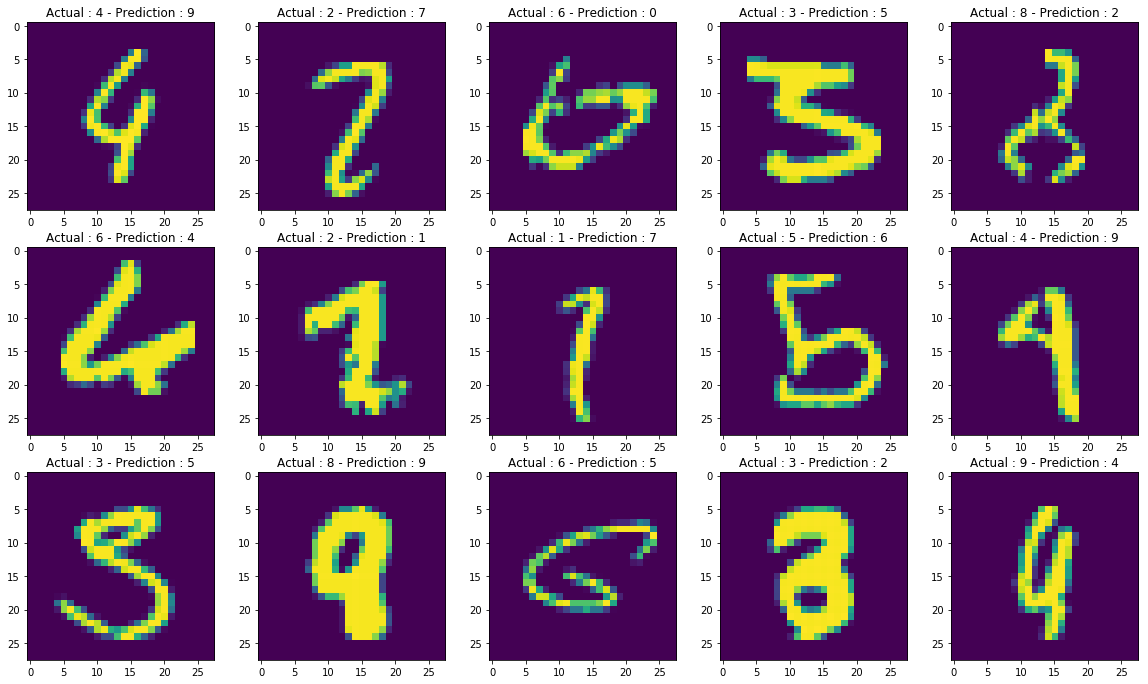

In [0]:
plot_images(X_test.squeeze(),y_test,(np.argmax(y_pred,1)))

# Observations :

1. We were able to reach a validation accuracy of 99.08% in 40 epochs.
2. Training/validation accuracy was less volatile, also gap was less due to regularization.
3. The misclassified images were plotted to create a gallery.